In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from numpy import log
from pandas import Series

In [169]:
# importing dataset
df = pd.read_csv('TCS.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,19.290001,19.770000,18.990000,19.379999,18.116087,280800
1,2015-01-05,19.110001,19.180000,18.129999,18.320000,17.125217,565300
2,2015-01-06,18.389999,18.690001,17.530001,18.480000,17.274782,457700
3,2015-01-07,18.629999,20.450001,18.629999,20.340000,19.013479,679600
4,2015-01-08,20.700001,21.680000,19.510000,21.209999,19.826738,1113300


# Pre-requisite rule in TSF

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2410 non-null   object 
 1   Open       2410 non-null   float64
 2   High       2410 non-null   float64
 3   Low        2410 non-null   float64
 4   Close      2410 non-null   float64
 5   Adj Close  2410 non-null   float64
 6   Volume     2410 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 131.9+ KB


In [173]:
df['Date'] = pd.to_datetime(df['Date'])

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2410 non-null   datetime64[ns]
 1   Open       2410 non-null   float64       
 2   High       2410 non-null   float64       
 3   Low        2410 non-null   float64       
 4   Close      2410 non-null   float64       
 5   Adj Close  2410 non-null   float64       
 6   Volume     2410 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 131.9 KB


In [177]:
df.duplicated().sum()

0

In [179]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Durbin-Watson Test

In [181]:
import statsmodels.api as sm
sm.stats.durbin_watson(df['Open'])

0.0015501836761495041

In [183]:
sm.stats.durbin_watson(df['Close'])

0.0016247191121125867

In [185]:
sm.stats.durbin_watson(df['Volume'])

1.52960201224595

In [187]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2410,2410.000000,2410.000000,2410.000000,2410.000000,2410.000000,2.410000e+03
mean,2019-10-15 20:13:32.614107904,7.147378,7.337469,6.959859,7.142842,6.865693,4.658444e+05
min,2015-01-02 00:00:00,0.500000,0.550000,0.500000,0.510000,0.510000,3.000000e+04
25%,2017-05-24 06:00:00,4.160000,4.260000,4.050000,4.150000,3.916739,1.857000e+05
50%,2019-10-15 12:00:00,5.640000,5.770000,5.480000,5.625000,5.314457,2.864500e+05
75%,2022-03-07 18:00:00,9.647500,10.020000,9.415000,9.717500,9.474022,4.767750e+05
max,2024-07-31 00:00:00,22.750000,23.500000,22.139999,22.940001,21.443914,5.965440e+07
std,NaN,4.643374,4.754139,4.534671,4.647426,4.447691,1.336804e+06


In [14]:
df.nunique()

Date         2359
Open         1880
High         2051
Low          2054
Close        2117
Adj Close    2172
Volume       2359
dtype: int64

<Axes: >

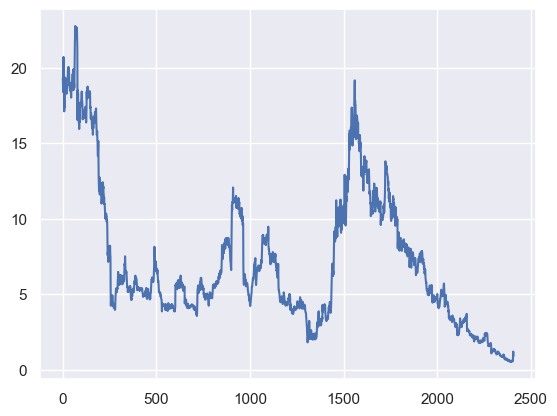

In [189]:
df['Open'].plot()

In [191]:
df['Time_Stamp'] = pd.DataFrame(df, columns=['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Time_Stamp
0,2015-01-02,19.290001,19.770000,18.990000,19.379999,18.116087,280800,2015-01-02
1,2015-01-05,19.110001,19.180000,18.129999,18.320000,17.125217,565300,2015-01-05
2,2015-01-06,18.389999,18.690001,17.530001,18.480000,17.274782,457700,2015-01-06
3,2015-01-07,18.629999,20.450001,18.629999,20.340000,19.013479,679600,2015-01-07
4,2015-01-08,20.700001,21.680000,19.510000,21.209999,19.826738,1113300,2015-01-08


In [193]:
df_final_model = df.set_index('Time_Stamp')
df_final_model.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Time_Stamp,,,,,,,
2015-01-02,2015-01-02,19.290001,19.770000,18.990000,19.379999,18.116087,280800
2015-01-05,2015-01-05,19.110001,19.180000,18.129999,18.320000,17.125217,565300
2015-01-06,2015-01-06,18.389999,18.690001,17.530001,18.480000,17.274782,457700
2015-01-07,2015-01-07,18.629999,20.450001,18.629999,20.340000,19.013479,679600
2015-01-08,2015-01-08,20.700001,21.680000,19.510000,21.209999,19.826738,1113300


In [18]:
df_final_model.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2359 entries, 2015-01-01 to 2024-07-25
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2359 non-null   datetime64[ns]
 1   Open       2359 non-null   float64       
 2   High       2359 non-null   float64       
 3   Low        2359 non-null   float64       
 4   Close      2359 non-null   float64       
 5   Adj Close  2359 non-null   float64       
 6   Volume     2359 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 147.4 KB


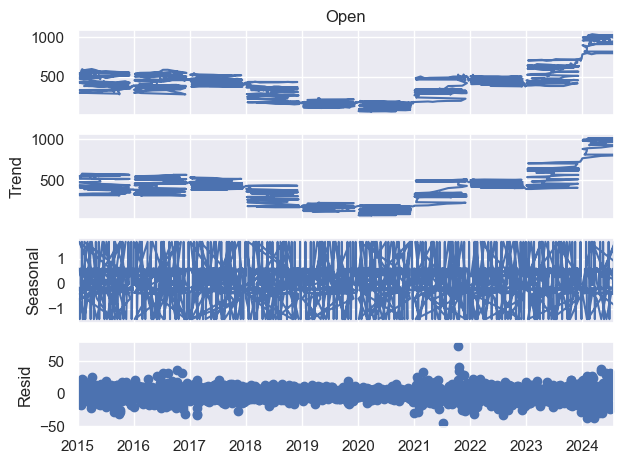

In [19]:
# Decomposition to check dataset
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df_final_model['Open'], period=12)
decompose.plot()
plt.show()

# Plot the boxplot of the 'Open' variable with respect to the different years

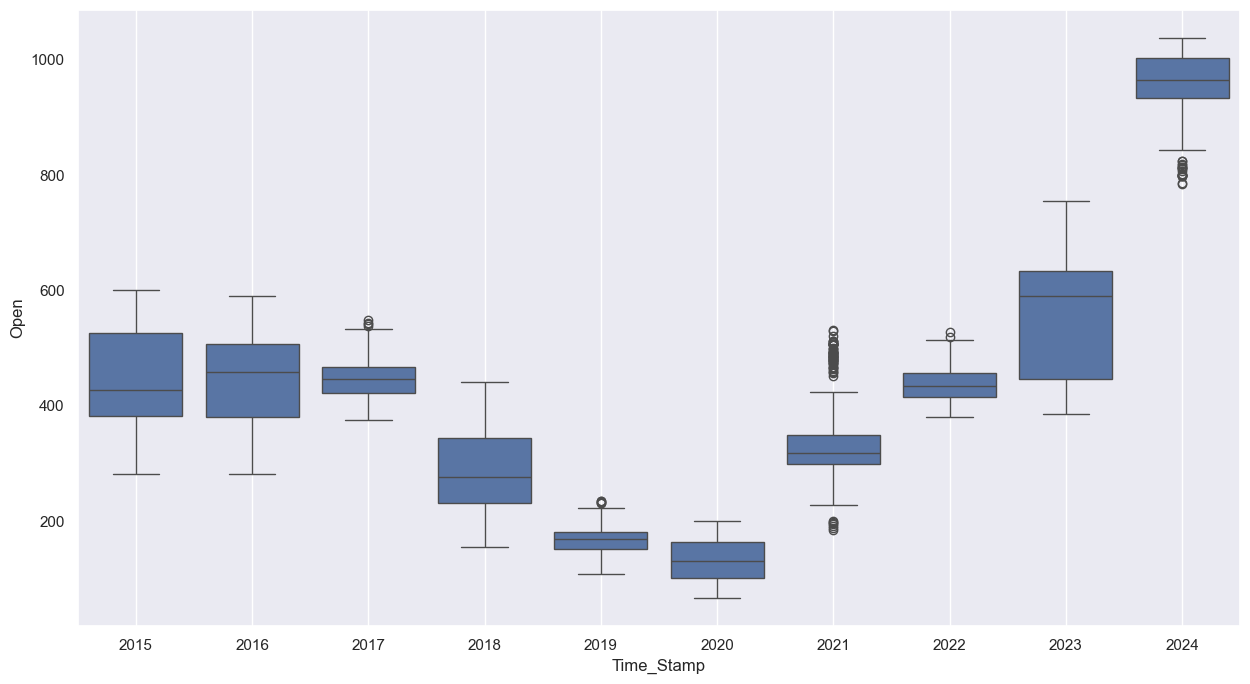

In [21]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df_final_model.index.year, y = df_final_model['Open'])
plt.grid();

In [22]:
df_final_model.index.year

Index([2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
       ...
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024],
      dtype='int32', name='Time_Stamp', length=2359)

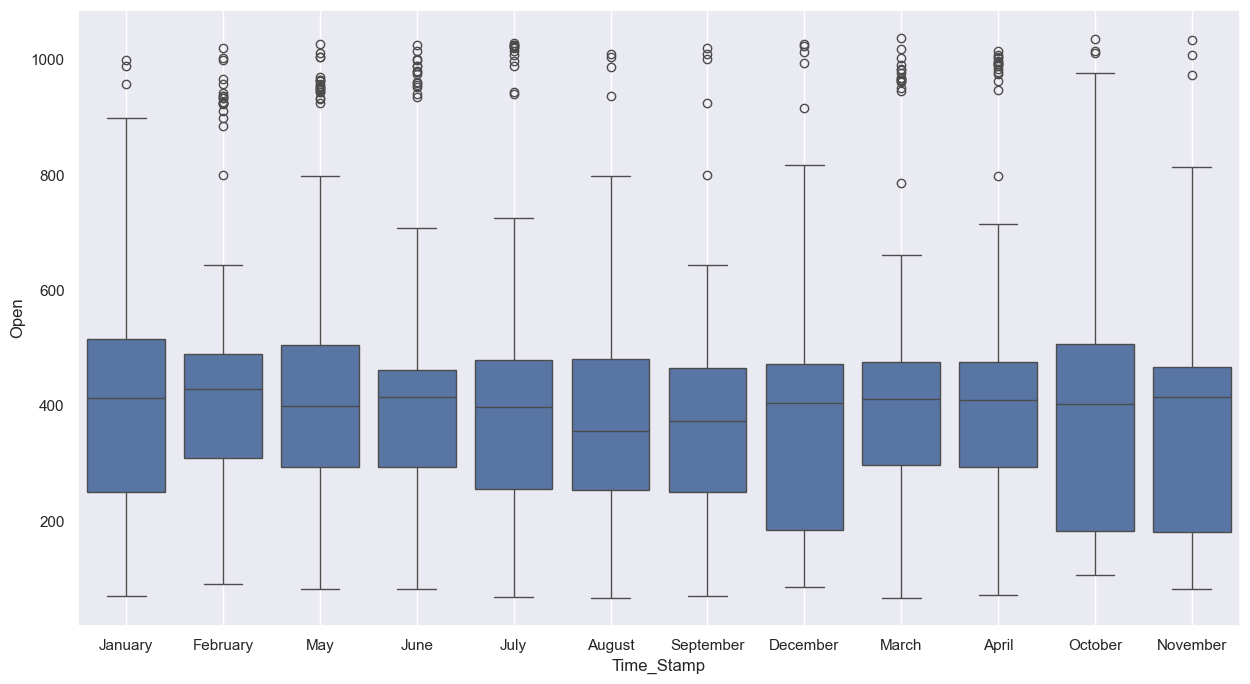

In [23]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df_final_model.index.month_name(), y = df_final_model['Open'])
plt.grid();

# Augmented Dickey Fuller Test - To check time series data is stationary or not

In [25]:
from statsmodels.tsa.stattools import adfuller

In [26]:
adfuller(df_final_model['Open'])

(1.067663049228532,
 0.9949309676406137,
 0,
 2358,
 {'1%': -3.4331262650681884,
  '5%': -2.8627665066966537,
  '10%': -2.5674229225037246},
 16929.732322310592)

In [27]:
def check_adftest(timeseries):
    result = adfuller(timeseries)
    print("Augmented Dickey Fuller Test - To check data is Stationary or not")
    labels = ['ADF Stats', 'P-Values','#Lags', 'No of observation']
    for i, j in zip(result, labels):
        print(j + " :-> " + str(i))

    if result[1] <=0.05:
        print("Strong evidence against null hypothesis and my time series is Stationary")
    else:
        print("Weak Evidence against null hypothes and my time series is Non-Stationary")

In [28]:
check_adftest(df_final_model['Open'])

Augmented Dickey Fuller Test - To check data is Stationary or not
ADF Stats :-> 1.067663049228532
P-Values :-> 0.9949309676406137
#Lags :-> 0
No of observation :-> 2358
Weak Evidence against null hypothes and my time series is Non-Stationary


In [29]:
df_final_model['1st Diff'] = df_final_model['Open'] - df_final_model['Open'].shift(1)

In [30]:
df_final_model

,Date,Open,High,Low,Close,Adj Close,Volume,1st Diff
Time_Stamp,,,,,,,,
2015-01-01,2015-01-01,489.252289,494.149750,487.026154,493.160370,489.917236,944551,NaN
2015-02-01,2015-02-01,491.973083,511.909271,491.973083,506.368683,503.038696,4193093,2.720794
2015-05-01,2015-05-01,504.686737,520.417969,501.322815,518.241333,514.833252,6758676,12.713654
2015-06-01,2015-06-01,508.891632,508.891632,493.951874,496.079071,492.816742,7979598,4.204895
2015-07-01,2015-07-01,489.746979,495.089661,484.008514,488.609192,485.395966,9232656,-19.144653
...,...,...,...,...,...,...,...,...
2024-07-19,2024-07-19,1024.000000,1024.000000,986.650024,990.000000,990.000000,7400178,1.049988
2024-07-22,2024-07-22,990.000000,1008.000000,976.549988,1003.150024,1003.150024,7396198,-34.000000
2024-07-23,2024-07-23,1007.900024,1008.650024,967.200012,1001.799988,1001.799988,10384177,17.900024


In [31]:
check_adftest(df_final_model['1st Diff'].dropna())

Augmented Dickey Fuller Test - To check data is Stationary or not
ADF Stats :-> -47.723753374898074
P-Values :-> 0.0
#Lags :-> 0
No of observation :-> 2357
Strong evidence against null hypothesis and my time series is Stationary


In [32]:
# split the data into train and test
start_date = df_final_model.index.min()
end_date = df_final_model.index.max()
print("Start Date of Stock  :", start_date)
print("End Data of the Stock :", end_date)

Start Date of Stock  : 2015-01-01 00:00:00
End Data of the Stock : 2024-12-07 00:00:00


In [33]:
train = df_final_model[pd.to_datetime(df_final_model['Date']) < pd.to_datetime('2022-02-02')]
test = df_final_model[pd.to_datetime(df_final_model['Date']) >= pd.to_datetime('2022-02-02')]

In [34]:
train.shape, test.shape

((1748, 8), (611, 8))

In [35]:
train_final = train[['1st Diff']]
test_final = test[['1st Diff']]

In [36]:
train_final

,1st Diff
Time_Stamp,
2015-01-01,NaN
2015-02-01,2.720794
2015-05-01,12.713654
2015-06-01,4.204895
2015-07-01,-19.144653
...,...
2022-01-07,-7.649994
2022-01-08,6.800018
2022-01-09,3.850006


In [37]:
test_final

,1st Diff
Time_Stamp,
2022-03-01,20.799988
2022-04-01,3.299988
2022-05-01,-9.849976
2022-06-01,-5.450012
2022-07-01,8.549988
...,...
2024-07-19,1.049988
2024-07-22,-34.000000
2024-07-23,17.900024


In [38]:
check_adftest(train_final['1st Diff'].dropna())

Augmented Dickey Fuller Test - To check data is Stationary or not
ADF Stats :-> -13.288438058812034
P-Values :-> 7.446364225718826e-25
#Lags :-> 7
No of observation :-> 1739
Strong evidence against null hypothesis and my time series is Stationary


In [39]:
check_adftest(test_final['1st Diff'].dropna())

Augmented Dickey Fuller Test - To check data is Stationary or not
ADF Stats :-> -10.418661136327966
P-Values :-> 1.7275651153132242e-18
#Lags :-> 6
No of observation :-> 604
Strong evidence against null hypothesis and my time series is Stationary


# Building Time Series Forecasting

## Facebook Prophet Model 

In [81]:
!pip install prophet

  Using cached prophet-1.1.5-py3-none-win_amd64.whl.metadata (3.6 kB)
  Using cached cmdstanpy-1.2.4-py3-none-any.whl.metadata (4.1 kB)
  Using cached importlib_resources-6.4.0-py3-none-any.whl.metadata (3.9 kB)
Using cached prophet-1.1.5-py3-none-win_amd64.whl (13.3 MB)
Using cached cmdstanpy-1.2.4-py3-none-any.whl (94 kB)
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ------ --------------------------------- 0.2/1.0 MB 3.3 MB/s eta 0:00:01
   ------------------ --------------------- 0.5/1.0 MB 5.1 MB/s eta 0:00:01
   ------------------------- -------------- 0.7/1.0 MB 5.2 MB/s eta 0:00:01
   ---------------------------------- ----- 0.9/1.0 MB 4.7 MB/s eta 0:00:01
   ---------------------------------------- 1.0/1.0 MB 5.1 MB/s eta 0:00:00
Using cached importlib_resources-6.4.0-py3-none-any.whl (38 kB)


In [83]:
import prophet
dir(prophet)

['Path',
 'Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'about',
 'diagnostics',
 'f',
 'forecaster',
 'here',
 'make_holidays',
 'models',
 'plot']

In [195]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Time_Stamp
0,2015-01-02,19.290001,19.770000,18.990000,19.379999,18.116087,280800,2015-01-02
1,2015-01-05,19.110001,19.180000,18.129999,18.320000,17.125217,565300,2015-01-05
2,2015-01-06,18.389999,18.690001,17.530001,18.480000,17.274782,457700,2015-01-06
3,2015-01-07,18.629999,20.450001,18.629999,20.340000,19.013479,679600,2015-01-07
4,2015-01-08,20.700001,21.680000,19.510000,21.209999,19.826738,1113300,2015-01-08
...,...,...,...,...,...,...,...,...
2405,2024-07-25,0.570000,1.440000,0.560000,1.050000,1.050000,59654400,2024-07-25
2406,2024-07-26,1.040000,1.290000,0.910000,1.200000,1.200000,4416200,2024-07-26
2407,2024-07-29,1.190000,1.370000,0.900000,0.970000,0.970000,3989300,2024-07-29
2408,2024-07-30,0.920000,0.950000,0.880000,0.900000,0.900000,675600,2024-07-30


In [199]:
df = df.iloc[:,:-1]
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,19.290001,19.770000,18.990000,19.379999,18.116087,280800
1,2015-01-05,19.110001,19.180000,18.129999,18.320000,17.125217,565300
2,2015-01-06,18.389999,18.690001,17.530001,18.480000,17.274782,457700
3,2015-01-07,18.629999,20.450001,18.629999,20.340000,19.013479,679600
4,2015-01-08,20.700001,21.680000,19.510000,21.209999,19.826738,1113300


In [241]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2410,2410.000000,2410.000000,2410.000000,2410.000000,2410.000000,2.410000e+03
mean,2019-10-15 20:13:32.614107904,7.147378,7.337469,6.959859,7.142842,6.865693,4.658444e+05
min,2015-01-02 00:00:00,0.500000,0.550000,0.500000,0.510000,0.510000,3.000000e+04
25%,2017-05-24 06:00:00,4.160000,4.260000,4.050000,4.150000,3.916739,1.857000e+05
50%,2019-10-15 12:00:00,5.640000,5.770000,5.480000,5.625000,5.314457,2.864500e+05
75%,2022-03-07 18:00:00,9.647500,10.020000,9.415000,9.717500,9.474022,4.767750e+05
max,2024-07-31 00:00:00,22.750000,23.500000,22.139999,22.940001,21.443914,5.965440e+07
std,NaN,4.643374,4.754139,4.534671,4.647426,4.447691,1.336804e+06


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2410 non-null   datetime64[ns]
 1   Open       2410 non-null   float64       
 2   High       2410 non-null   float64       
 3   Low        2410 non-null   float64       
 4   Close      2410 non-null   float64       
 5   Adj Close  2410 non-null   float64       
 6   Volume     2410 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 131.9 KB


In [203]:
from prophet import Prophet

In [205]:
df_prophet = df.rename(columns={'Date':'ds', 'Open':'y'})
df_prophet

,ds,y,High,Low,Close,Adj Close,Volume
0,2015-01-02,19.290001,19.770000,18.990000,19.379999,18.116087,280800
1,2015-01-05,19.110001,19.180000,18.129999,18.320000,17.125217,565300
2,2015-01-06,18.389999,18.690001,17.530001,18.480000,17.274782,457700
3,2015-01-07,18.629999,20.450001,18.629999,20.340000,19.013479,679600
4,2015-01-08,20.700001,21.680000,19.510000,21.209999,19.826738,1113300
...,...,...,...,...,...,...,...
2405,2024-07-25,0.570000,1.440000,0.560000,1.050000,1.050000,59654400
2406,2024-07-26,1.040000,1.290000,0.910000,1.200000,1.200000,4416200
2407,2024-07-29,1.190000,1.370000,0.900000,0.970000,0.970000,3989300
2408,2024-07-30,0.920000,0.950000,0.880000,0.900000,0.900000,675600


In [207]:
df_prophet['ds'].max()

Timestamp('2024-07-31 00:00:00')

In [209]:
m = Prophet()
model = m.fit(df_prophet)

21:30:31 - cmdstanpy - INFO - Chain [1] start processing
21:30:32 - cmdstanpy - INFO - Chain [1] done processing


In [211]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None}),
             ('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [213]:
# Last date - 2024-07-25
future_global = model.make_future_dataframe(periods=100, freq='D')
future_global.tail()

,ds
2505,2024-11-04
2506,2024-11-05
2507,2024-11-06
2508,2024-11-07
2509,2024-11-08


In [215]:
#2024-12-07
len(df_prophet)

2410

In [217]:
df_prophet.tail()

,ds,y,High,Low,Close,Adj Close,Volume
2405,2024-07-25,0.57,1.44,0.56,1.05,1.05,59654400
2406,2024-07-26,1.04,1.29,0.91,1.20,1.20,4416200
2407,2024-07-29,1.19,1.37,0.90,0.97,0.97,3989300
2408,2024-07-30,0.92,0.95,0.88,0.90,0.90,675600
2409,2024-07-31,0.91,0.94,0.85,0.88,0.88,486600


In [219]:
future_global.tail(20)

,ds
2490,2024-10-20
2491,2024-10-21
2492,2024-10-22
2493,2024-10-23
2494,2024-10-24
2495,2024-10-25
2496,2024-10-26
2497,2024-10-27
2498,2024-10-28
2499,2024-10-29


In [221]:
len(future_global)

2510

In [229]:
2510-2410

100

In [231]:
prediction = model.predict(future_global)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-02,20.609498,19.037703,21.900855,20.609498,20.609498,-0.153424,-0.153424,-0.153424,0.365824,0.365824,0.365824,-0.519248,-0.519248,-0.519248,0.0,0.0,0.0,20.456074
1,2015-01-05,20.541915,19.035274,21.866540,20.541915,20.541915,-0.207692,-0.207692,-0.207692,0.364935,0.364935,0.364935,-0.572627,-0.572627,-0.572627,0.0,0.0,0.0,20.334223
2,2015-01-06,20.519387,18.896044,21.769564,20.519387,20.519387,-0.218212,-0.218212,-0.218212,0.371816,0.371816,0.371816,-0.590028,-0.590028,-0.590028,0.0,0.0,0.0,20.301176
3,2015-01-07,20.496860,18.871700,21.592394,20.496860,20.496860,-0.243979,-0.243979,-0.243979,0.362882,0.362882,0.362882,-0.606862,-0.606862,-0.606862,0.0,0.0,0.0,20.252881
4,2015-01-08,20.474332,18.719702,21.670521,20.474332,20.474332,-0.275988,-0.275988,-0.275988,0.346902,0.346902,0.346902,-0.622890,-0.622890,-0.622890,0.0,0.0,0.0,20.198344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2505,2024-11-04,-1.389659,-2.772206,0.465068,-1.887514,-0.958083,0.258347,0.258347,0.258347,0.364935,0.364935,0.364935,-0.106588,-0.106588,-0.106588,0.0,0.0,0.0,-1.131312
2506,2024-11-05,-1.398415,-2.771333,0.383928,-1.908477,-0.960151,0.264735,0.264735,0.264735,0.371816,0.371816,0.371816,-0.107081,-0.107081,-0.107081,0.0,0.0,0.0,-1.133680
2507,2024-11-06,-1.407171,-2.628052,0.410711,-1.927808,-0.956439,0.256413,0.256413,0.256413,0.362882,0.362882,0.362882,-0.106469,-0.106469,-0.106469,0.0,0.0,0.0,-1.150759
2508,2024-11-07,-1.415928,-2.832903,0.493100,-1.952761,-0.958349,0.242129,0.242129,0.242129,0.346902,0.346902,0.346902,-0.104773,-0.104773,-0.104773,0.0,0.0,0.0,-1.173799


In [233]:
prediction.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [235]:
prediction[['ds', 'yhat_lower', 'yhat_upper', 'yhat']].tail(100)

,ds,yhat_lower,yhat_upper,yhat
2410,2024-08-01,-1.293138,1.553375,0.118924
2411,2024-08-02,-1.236739,1.504460,0.117868
2412,2024-08-03,-2.641529,0.204656,-1.173824
2413,2024-08-04,-2.620803,0.188245,-1.193208
2414,2024-08-05,-1.313024,1.498729,0.058839
...,...,...,...,...
2505,2024-11-04,-2.772206,0.465068,-1.131312
2506,2024-11-05,-2.771333,0.383928,-1.133680
2507,2024-11-06,-2.628052,0.410711,-1.150759
2508,2024-11-07,-2.832903,0.493100,-1.173799


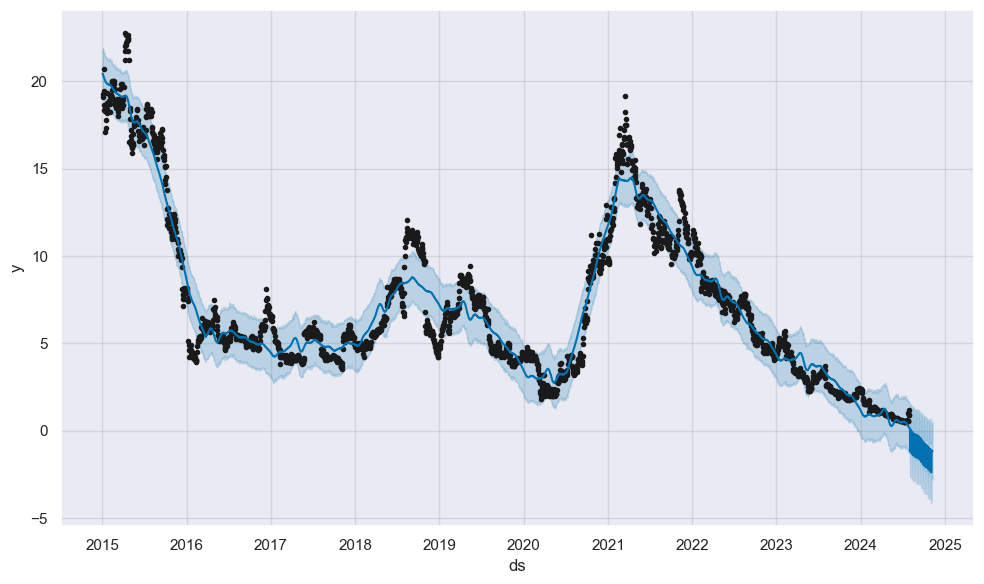

In [237]:
model.plot(prediction)
plt.show()

In [ ]:
# ARIMA = AR = Partial autocorrelation (P)
# I - integrated (Difference) = D = 1
# MA - Auto correlation (Q)
# PARAMETER = P D Q


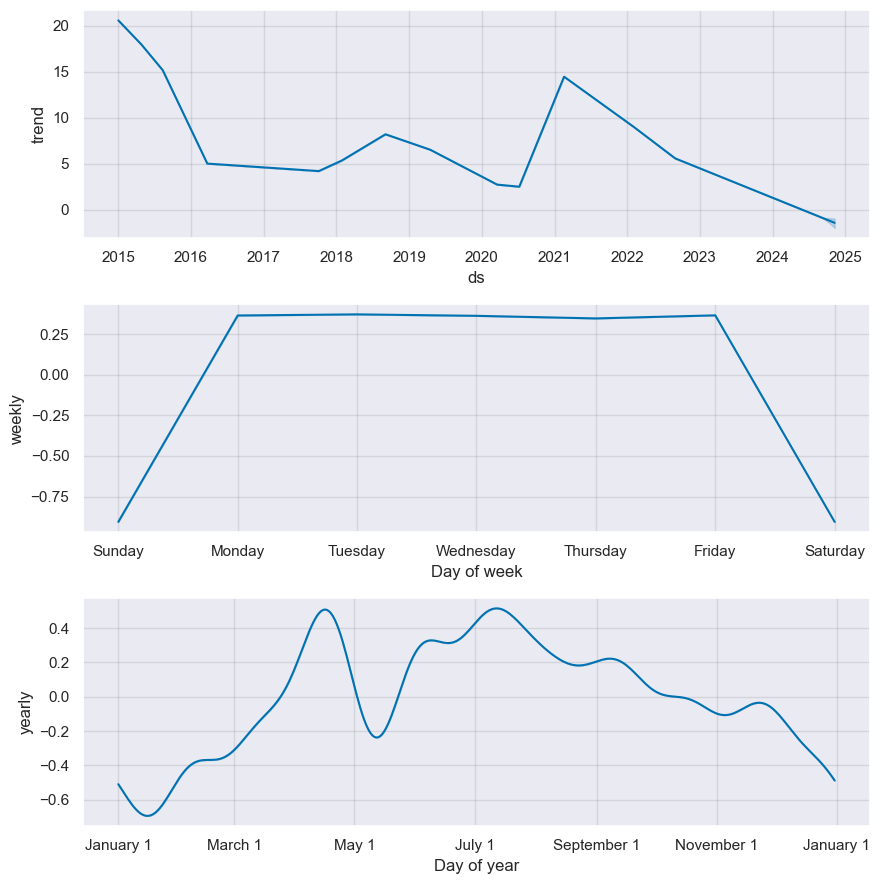

In [239]:
model.plot_components(prediction)
plt.show()